### Simulating Brain Function & Predicting Memory Using AI

This notebook simulates a biologically inspired cognitive system and uses a neural network to predict memory performance based on upstream brain features.

---

### 1. Simulating Brain Data

- Each subject is assigned to a group: **Control**, **Citrate**, or **Threonate**, which sets their **brain magnesium** level.
- We introduce realistic biological variables:
  - `Estrogen` – a hormone that upregulates NR2B
  - `BDNF` – a neurotrophin involved in synaptic plasticity
- These variables influence **NR2B receptor expression**, which boosts:
  → **LTP** (learning strength)  
  → **Synaptic Density** (brain connectivity)

- The **memory score** is a weighted combination of LTP and synaptic density, with added noise to reflect natural biological variation.

---

### 2. Machine Learning Model

- We use a **Multi-Layer Perceptron Regressor (MLP)** to learn how these features predict memory score.
- The dataset is split into training and test sets using `train_test_split`.
- The MLP model is trained on:
  - Brain_Mg, Estrogen, BDNF, NR2B, LTP, Synaptic Density
- It attempts to **predict memory performance** from upstream biological signals.

---

### 3. Evaluation & Visualization

- We calculate the **Mean Squared Error (MSE)** to assess prediction accuracy.
- A scatterplot compares **true vs. predicted memory scores**.
  - Points near the red dashed line show accurate predictions.
  - This plot visualizes how well the AI learned the simulated brain’s logic.

---

This approach allows for hypothesis testing and exploration of brain performance mechanisms — with no real-world data required.

Mean Squared Error: 0.0034


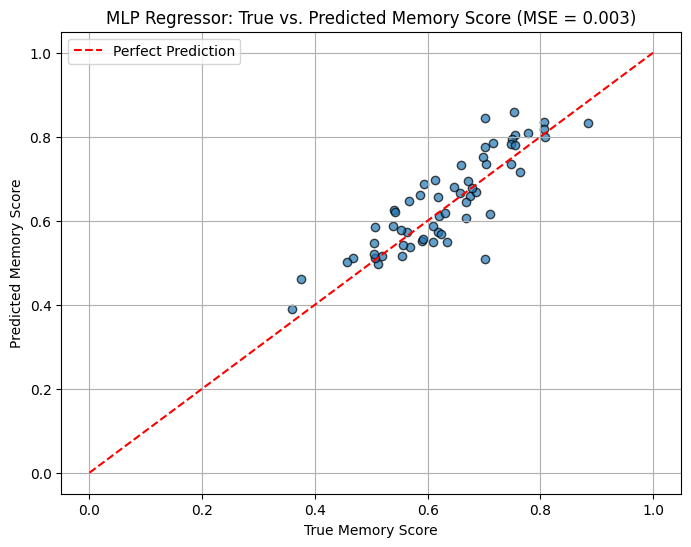

In [6]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd

# Load the CSV file (make sure it's in the Colab Files pane)
import numpy as np
import pandas as pd

np.random.seed(42)
n_samples = 300
group = np.random.choice(['Control', 'Citrate', 'Threonate'], size=n_samples)

def simulate_brain_mg(grp):
    if grp == 'Control':
        return np.random.normal(0.3, 0.05)
    elif grp == 'Citrate':
        return np.random.normal(0.5, 0.05)
    else:  # Threonate
        return np.random.normal(0.8, 0.05)

brain_mg = np.array([simulate_brain_mg(g) for g in group])
estrogen = np.random.normal(0.5, 0.1, size=n_samples)
bdnf = np.random.normal(0.5, 0.1, size=n_samples)
age = np.random.normal(40, 12, size=n_samples)

# NR2B now influenced by multiple biological factors
nr2b = (
    0.5 * brain_mg +
    0.3 * estrogen +
    0.2 * bdnf +
    np.random.normal(0, 0.05, size=n_samples)
)

ltp = nr2b + np.random.normal(0, 0.05, size=n_samples)
syn_density = ltp + np.random.normal(0, 0.05, size=n_samples)
memory_score = 0.2 + 0.5 * ltp + 0.3 * syn_density + np.random.normal(0, 0.03, size=n_samples)

# Final dataset
data = pd.DataFrame({
    'Group': group,
    'Brain_Mg': brain_mg,
    'Estrogen': estrogen,
    'BDNF': bdnf,
    'Age': age,
    'NR2B': nr2b,
    'LTP': ltp,
    'Synaptic_Density': syn_density,
    'Memory_Score': memory_score
})

# Preview the dataset
data.head()

# Select features and target
features = ['Brain_Mg', 'Estrogen', 'BDNF', 'NR2B', 'LTP', 'Synaptic_Density']
target = 'Memory_Score'

X = data[features]
y = data[target]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train a Multi-Layer Perceptron regressor
mlp = MLPRegressor(
    hidden_layer_sizes=(10, 10),
    max_iter=1000,
    random_state=42
)
mlp.fit(X_train, y_train)

# Predict on test set
y_pred = mlp.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

# Plot predictions vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolor='k')
plt.plot([0, 1], [0, 1], '--r', label='Perfect Prediction')
plt.xlabel("True Memory Score")
plt.ylabel("Predicted Memory Score")
plt.title(f"MLP Regressor: True vs. Predicted Memory Score (MSE = {mse:.3f})")
plt.legend()
plt.grid(True)
plt.show()


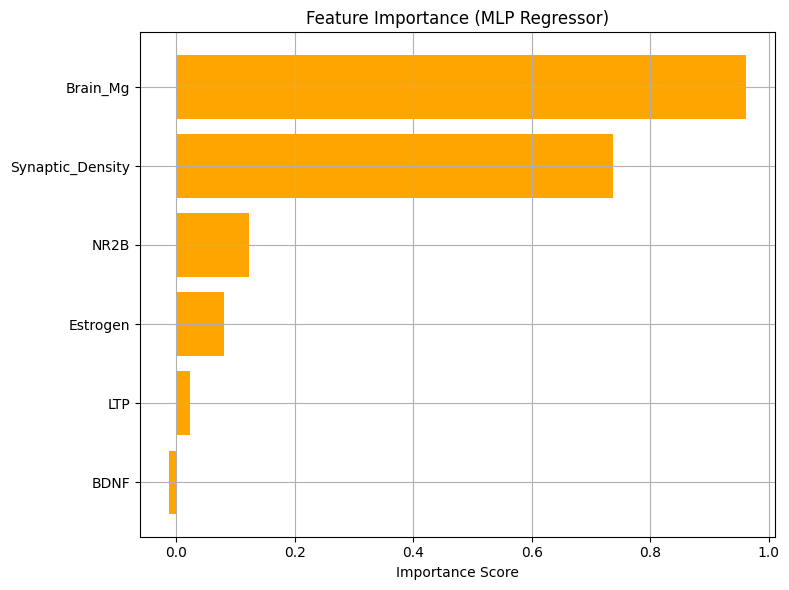

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

# Make sure your model is already trained (mlp), and you have X_test, y_test

# Compute permutation importance
result = permutation_importance(
    mlp, X_test, y_test,
    n_repeats=30,
    random_state=42
)

# Extract scores and feature names
importance_scores = result.importances_mean
feature_names = X.columns
sorted_idx = np.argsort(importance_scores)

# Plot
plt.figure(figsize=(8, 6))
plt.barh(range(len(sorted_idx)), importance_scores[sorted_idx], align='center', color='orange')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Importance Score")
plt.title("Feature Importance (MLP Regressor)")
plt.grid(True)
plt.tight_layout()
plt.show()
